# Loading Image Data

So far we've been working with fairly artificial datasets that you wouldn't typically be using in real projects. Instead, you'll likely be dealing with full-sized images like you'd get from smart phone cameras. In this notebook, we'll look at how to load images and use them to train neural networks.

We'll be using a [dataset of cat and dog photos](https://www.kaggle.com/c/dogs-vs-cats) available from Kaggle. Here are a couple example images:

<img src='assets/dog_cat.png'>

We'll use this dataset to train a neural network that can differentiate between cats and dogs. These days it doesn't seem like a big accomplishment, but five years ago it was a serious challenge for computer vision systems.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

The easiest way to load image data is with `datasets.ImageFolder` from `torchvision` ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)). In general you'll use `ImageFolder` like so:

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
```

where `'path/to/data'` is the file path to the data directory and `transform` is a list of processing steps built with the [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) module from `torchvision`. ImageFolder expects the files and directories to be constructed like so:
```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

where each class has it's own directory (`cat` and `dog`) for the images. The images are then labeled with the class taken from the directory name. So here, the image `123.png` would be loaded with the class label `cat`. You can download the dataset already structured like this [from here](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip). I've also split it into a training set and test set.

> **Note.** When using https://notebooks.dclabra.fi/ -environment, do not download dataset to your own Docker container, but use shared folder `/home/jovyan/work/cat_dog/` instead!  


### Transforms

When you load in the data with `ImageFolder`, you'll need to define some transforms. For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc. We'll also need to convert the images to PyTorch tensors with `transforms.ToTensor()`. Typically you'll combine these transforms into a pipeline with `transforms.Compose()`, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

```python
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

```

There are plenty of transforms available, I'll cover more in a bit and you can read through the [documentation](http://pytorch.org/docs/master/torchvision/transforms.html). 

### Data Loaders

With the `ImageFolder` loaded, you have to pass it to a [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader). The `DataLoader` takes a dataset (such as you would get from `ImageFolder`) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

Here `dataloader` is a [generator](https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/). To get data out of it, you need to loop through it or convert it to an iterator and call `next()`.

```python
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```
 
>**Exercise 7.1:** Load images from the `Cat_Dog_data/train` folder, define a few transforms, then build the dataloader.

In [2]:
## Exercise 7.1:


## TODO: set correct path here
data_dir = '/home/jovyan/work/cat_dog/' 

# TODO: compose transforms here
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(244),
                                transforms.ToTensor()])

# TODO: create the ImageFolder
dataset = datasets.ImageFolder('/home/jovyan/work/cat_dog/Cat_Dog_data/train/', transform = transform)

# TODO: use the ImageFolder dataset to create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle=True)

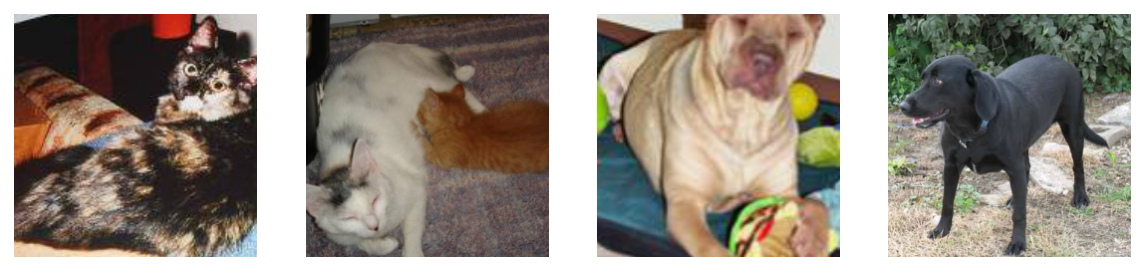

In [3]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

In [4]:
print(images[0].shape)
print("\nbatch, color channels ja kuvan koko")
print()
print(images.shape)
print(labels.shape)

torch.Size([3, 244, 244])

batch, color channels ja kuvan koko

torch.Size([32, 3, 244, 244])
torch.Size([32])


If you loaded the data correctly, you should see something like this (your image will be different):

<img src='assets/cat_cropped.png' width=244>

## Data Augmentation

A common strategy for training neural networks is to introduce randomness in the input data itself. For example, you can randomly rotate, mirror, scale, and/or crop your images during training. This will help your network generalize as it's seeing the same images but in different locations, with different sizes, in different orientations, etc.

To randomly rotate, scale and crop, then flip your images you would define your transforms like this:

```python
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
```

You'll also typically want to normalize images with `transforms.Normalize`. You pass in a list of means and list of standard deviations, then the color channels are normalized like so

```input[channel] = (input[channel] - mean[channel]) / std[channel]```

Subtracting `mean` centers the data around zero and dividing by `std` squishes the values to be between -1 and 1. Normalizing helps keep the network work weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

You can find a list of all [the available transforms here](http://pytorch.org/docs/0.3.0/torchvision/transforms.html). When you're testing however, you'll want to use images that aren't altered (except you'll need to normalize the same way). So, for validation/test images, you'll typically just resize and crop.

>**Exercise 7.2:** Define transforms for training data and testing data below. Leave off normalization for now.

In [5]:
## Exercise 7.2:
## Note: Do not use normalization. 

data_dir = '/home/jovyan/work/cat_dog/Cat_Dog_data/'

# TODO: Define transforms for the training data and testing data

# Harjoitusdata satunnaistetaan

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5, 0.5, 0.5],
                                                          [0.5, 0.5, 0.5])])
                                     

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


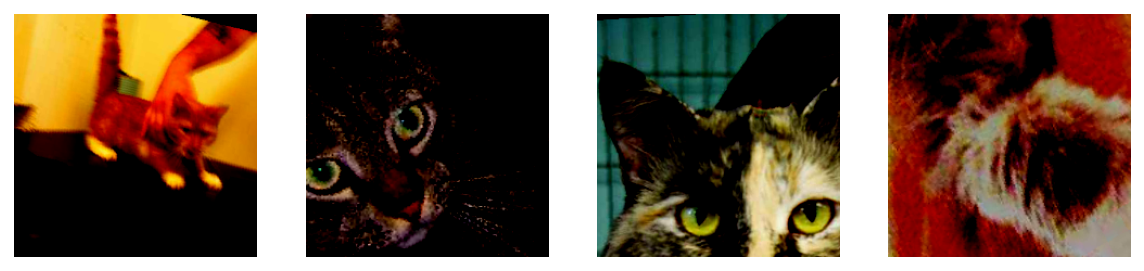

In [6]:
# change this to the trainloader or testloader 
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

Your transformed images should look something like this.

<center>Training examples:</center>
<img src='assets/train_examples.png' width=500px>

<center>Testing examples:</center>
<img src='assets/test_examples.png' width=500px>

At this point you should be able to load data for training and testing. Now, you should try building a network that can classify cats vs dogs. This is quite a bit more complicated than before with the MNIST and Fashion-MNIST datasets. To be honest, you probably won't get it to work with a fully-connected network, no matter how deep. These images have three color channels and at a higher resolution (so far you've seen 28x28 images which are tiny).

In the next part, I'll show you how to use a pre-trained network to build a model that can actually solve this problem.

# Optional TODO: 
#### Attempt to build a network to classify cats vs dogs from this dataset

##### Printataan datan ominaisuudet esille

In [7]:
print(images[0].shape)
print(images.shape)
print(labels.shape)

torch.Size([3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32])


In [8]:
#images = images.view(images.shape[0], -1)
print(images.shape)

torch.Size([32, 3, 224, 224])


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### --------------------------------------------------------------------------------------------------------
Kuvantunnistukseen tarkoitetut neuroverkot ovat pääsääntöisesti yhdistelmiä kuvan ominaisuuksien (features) etsimiseen ja päätöksentekoon (classification) tarkoitetuista neuroverkosta. Kuvan ominaisuuksien tunnistamiseen käytetyt menetelmät ovat pääsääntöisesti yleistyksiä perinteisistä kuvankäsittelymenetelmistä, mutta niissä käytettävät suodattimet (filters) opetetaan käyttäen syväoppimista. Päätöksentekoon taas käytetään yleisesti täysin kytkettyjä (FC) neuroverkkoja ja softmax -funktiota. 

Syy, miksi kuvankäsittelyyn ei käytetä täysin kytkettyjä neuroverkkoja (FC), on kuvapikselien suuri lukumäärä ja sen myötä verkon nopea kasvaminen todella suureksi. Tyypillisessä luokitteluun käytettävässä kuvassa on esim. 3x 224x224 = 150 528 pikseliä. Jos nämä kaikki kytkettäisiin vaikka 512 neuroniin ensimmäisellä kerroksella, jo tähän yhteen kerrokseen tulisi 512 x 150 528 + 512 ~ 77M parametria, joka on enemmän kuin AlexNet -verkossa. Vertailun vuoksi vaikkapa VGG-16 verkossa on ensimmäisellä konvoluutiokerroksella 64x 3x3 = 576 parametria.
### --------------------------------------------------------------------------------------------------------

# Model

Lähdin kokeilemaan kissakoiradatan luokittelua konvoluutuoverkoilla ja kokeilin useampaa eri versioita. Isoja eroja testaamieni versioiden välillä ei löytynyt. Mikään verkko ei lähtenyt kunnolla oppimaan. Verkkojen tarkkuus vaihteli 50-60 % välillä. Yli 60% tarkkuutta en onnistunut saamaan kertaakaan. Tämän olisi voinut toteuttaa valmiilla verkolla, joka on valmiiksi koulutettu, mutta se olisi ollut tylsempää ja siinä tuskin olisi oppinut yhtä paljon.

In [10]:
# from torch.nn import Module, Conv2d, Linear, MaxPool2d, AdaptiveAvgPool1d
# from torch.nn.functional import relu, dropout

class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.conv_1 = nn.Conv2d(3, 64, 5)
        self.conv_2 = nn.Conv2d(64, 128, 3)
        self.conv_3 = nn.Conv2d(128, 256, 5)
        
        self.maxPooling = nn.MaxPool2d(4)
        self.adPooling = nn.AdaptiveAvgPool1d(256)
        
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout()
        
        
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 2)
    

    def forward(self, x):
        x = self.conv_1(x)
        x = self.maxPooling(x)
        x = self.relu(x)
        
        x = self.conv_2(x)
        x = self.maxPooling(x)
        x = self.relu(x)
        
        x = self.conv_3(x)
        x = self.maxPooling(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        #x = x.view(x.shape[0], -1)
        x = x.view(1, x.size()[0], -1)
        x = self.adPooling(x).squeeze()
        
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        #x = F.log_softmax(self.out(x), dim=1)
        
        return F.log_softmax(self.out(x), dim=1)

In [11]:
model = Network()
print(model.parameters)

<bound method Module.parameters of Network(
  (conv_1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv_3): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (maxPooling): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (adPooling): AdaptiveAvgPool1d(output_size=256)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)>


In [12]:
from torch import nn, optim
import torch.nn.functional as F

class Network2(nn.Module):
    
    def __init__(self):
        super(Network2, self).__init__()
        self.conv_1 = nn.Conv2d(3, 64, 5)
        self.conv_2 = nn.Conv2d(64, 128, 3)
        self.conv_3 = nn.Conv2d(128, 256, 5)
        
        self.maxPooling = nn.MaxPool2d(4)
        self.adPooling = nn.AdaptiveAvgPool1d(256)
        
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout()
        self.relu = nn.ReLU()
        
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 2)
        
        
    def forward(self, x):

        x = self.dropout(self.relu(self.maxPooling(self.conv_1(x))))
        x = self.dropout(self.relu(self.maxPooling(self.conv_2(x))))
        x = self.dropout(self.relu(self.maxPooling(self.conv_3(x))))
        
        x = x.view(1, x.size()[0], -1)
        x = self.adPooling(x).squeeze()
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        
        
        x = F.log_softmax(self.out(x), dim=1)
        
        return x

In [37]:
model3 = Network2()
print(model3)

Network2(
  (conv_1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv_3): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (maxPooling): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (adPooling): AdaptiveAvgPool1d(output_size=256)
  (softmax): Softmax(dim=1)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)


In [13]:
# Tehdään vielä kolmas konvoluutioverkko 
import torch.nn.functional as F

class Network3(nn.Module):
    def __init__(self):
        super(Network3, self).__init__()
        # Määritellään taas kerrokset konvoluutioverkolle
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 28 * 28, 32)
        self.fc2 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(0.2)
        self.batch_norm = nn.BatchNorm1d(num_features=32)
        
    def forward(self,x):
        # Määritellään verkon järjestys taas
        x = self.dropout(self.pool(F.relu(self.conv1(x))))
        x = self.dropout(self.pool(F.relu(self.conv2(x))))
        x = self.dropout(self.pool(F.relu(self.conv3(x))))
        x = x.view(x.size(0), -1)
       # x = x.view(1, x.size()[0], -1)
        x = self.dropout(F.relu(self.batch_norm(self.fc1(x))))
        x = self.fc2(x)
        
        return x
print(model)

Network(
  (conv_1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv_3): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (maxPooling): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (adPooling): AdaptiveAvgPool1d(output_size=256)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)


#### Vaihdetaan laskenta CPU:lta GPU:lle
Eli vaihdetaan laskenta perinteiseltä prosessorilta CUDA:lle, eli näytönohjaimen grafiikkasuorittimelle, jotta laskenta olisi nopeampaa rinnakkailaskennan ansioista.

In [14]:
# Tällä tarkisteaan, löytyykö Nvidian kehittämä CUDA-rajapinta/alusta
# CUDA on siis tarkoitettu GPU-laskentaan
torch.cuda.is_available()

True

**True** => näytönohjain ja CUDA-ominaisuus löytyy

In [15]:
# Määritetään device eli valitaan laskentaan GPU CPU:n sijasta
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [16]:
# Tämän hetkinen käytössä oleva suoritin
print(f'Device using: {device}')

Device using: cuda:0


In [17]:
# Määritän verkon, jonka valitsen käyttöön

#model = Conv()
#model = Network()
#model = Network2()
model = Network3()
#model = Net()

In [18]:
import time
for device in ['cpu', 'cuda']:
    criterion = nn.CrossEntropyLoss()
   # criterion = nn.NLLLoss()
   # optimizer = optim.Adam(model.parameters(), lr=0.001)
    optimizer = optim.SGD(model.parameters(), lr = 0.03)
    model.to(device)

    for ii, (images, labels) in enumerate(trainloader):

        # Move input and label tensors to the GPU
        images, labels = images.to(device), labels.to(device)

        start = time.time()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

Device = cpu; Time per batch: 0.131 seconds
Device = cuda; Time per batch: 0.001 seconds


### Verkon koulutus

In [19]:
from torch import nn, optim

criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Määritellään koulutuskierrokset
epochs = 1
steps = 0
print_every = 5
running_train_loss = 0

# Luodaan listat virheille
train_losses, test_losses = [], []

for epoch in range(epochs):
    
    for images, labels in trainloader:
        steps += 1
        # Kuvien muunnos vektorimuotoon view-metodia käyttäen
        # Vektorin pituus on imagen koko (ensimmäisestä alkioista viimeiseen)        
        #images = images.view(images.shape[0], -1)
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        # Koulutuskierroksen (epochin) virhe 
        running_train_loss += loss.item()
        
        if steps % print_every == 0:
            running_test_loss = 0
            running_accuracy = 0
            model.eval()
            with torch.no_grad():    
                for images, labels in testloader:
                    images, labels = images.to(device), labels.to(device)
                    # Muutetaan vektoriksi, jonka pituus on image-muuttujan koko
                    #images = images.view(images.shape[0], -1)

                    output = model.forward(images)
                    loss = criterion(output, labels)

                    # item() -metodi purkaa loss-arvon pythonille sopivaksi float-arvoksi
                    running_test_loss += loss.item()

                    ps = torch.exp(output)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    
                    running_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            # Luodaan muuttujat
            train_loss = running_train_loss/len(trainloader)
            test_loss = running_test_loss/len(testloader)
            test_accuracy = running_accuracy/len(testloader)

            # Lisätään virheet listoihin
            train_losses.append(train_loss)
            test_losses.append(test_loss)
            test_losses.append(test_loss)

            # Jaetaan oikeat ennusteet siihen käytetyllä datalla
            print(f'Device using: {device}')
            print(f'Epoch {epoch+1}/{epochs}')
            print('Step', steps)
            print(f'Accuracy: {running_accuracy/len(testloader)*100}%')
            print(f"Training loss: {running_train_loss/len(trainloader)*100}")
            print(f"Test loss: {running_test_loss/len(testloader)*100}")
            print()
            
            running_train_loss = 0
            model.train()

KeyboardInterrupt: 

In [ ]:
epochs = 5
steps = 0

train_losses, test_losses = [], []

for e in range(epochs):
    running_train_loss = 0
    # Harjoitusdata käyttöön
    for images, labels in trainloader:
        model.to(device)
        images, labels = images.to(device), labels.to(device)
        # Gradienttien nollaus
        optimizer.zero_grad()
        # Lasketaan verkon antamat ennusteet
        log_ps = model(images)
        # Lasketaan virhe 
        loss = criterion(log_ps, labels)
        # Lasketaan gradientit
        loss.backward()
        # Päivitetään uudet arvot 
        optimizer.step()
        
        # Koulutuskierroksen virhe harjoitusdatalla
        running_train_loss += loss.item()
                
    else:
        running_test_loss = 0
        running_accuracy = 0
        
        # Verkko arviointitilaan (evaluointi/validointi)
        model.eval()        

        # Gradientin tulee myös olla pois validoinnin aikana
        with torch.no_grad():        
    
            # Testidata käyttöön
            for images, labels in testloader:
                
                output = model(images)
                loss = criterion(output, labels)
                
                
                # Koulutuskierroksen virhe testidatalla
                running_test_loss += loss.item()
                
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                
                equals = top_class == labels.view(*top_class.shape)
                
                accuracy = torch.mean(equals.type(torch.FloatTensor)).item()
                
                running_accuracy += accuracy
        
        
            print(f'Accuracy: {running_accuracy/len(testloader)*100}%')
            print(f"Training loss: {running_train_loss/len(trainloader)*100}")
        
            # Määritellään muuttujiksi
            test_loss = running_test_loss/len(testloader)
            train_loss = running_train_loss/len(trainloader)
            test_accuracy = running_accuracy/len(testloader)
        
            # Lisätään listoihin
            train_losses.append(train_loss)
            test_losses.append(test_loss)
        
        # Verkko takisin harjoitustilaan
        model.train()

Koulutus/validointiloopit eivät enää toimi näillä nykyisillä verkoilla. Prosessi lähtee käyntiin eikä erroreita tule, mutta jäsähtää raksuttamaan ja ei eitene mihinkään pidemmänkään odottelun jälkeen.

## Reflection

Answer briefly following questions (in English or Finnish):
- What is torchvision?
- Why to use data augmentation?
- Why to use image resize function?
- Why to use data normalization to image data?


*Your answers here...*

### What is torchvision?

Pytorchissa oleva kirjasto, joka on tarkoitettu kuvien tunnistamiseen ja luokitteluun. Kirjasto sisältää mm. datasettejä, modeleita, kuvien muokkaamiseen käytettäviä metodeja ja konenäon.

### Why to use data augmentation?

Neuroverkkojen koulutukseen kuuluu aiheuttaa satunnaisuutta koulutusdataan. Tätä tehdään esimerkiksi muokkaamalla kuvia kääntelemällä, peilailemalla ja rajaamalla niitä. Tämä auttaa verkkoa oppimaan.

### Why to use image resize function?

Kuvien täytyy olla samankokoisia koulutuksessa.

### Why to use data normalization to image data?

Haluamme normalisoida kuvien värikanavat, joita on 3 jos väriluokka on RGB. Ilman normalisointia verkot eivät yleensä opi, ei ainakaan yhtä hyvin. Normalisointi pitää painoarvot (weights) lähellä nollaa.